In [7]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd
import pandas as pd

In [67]:
a = nrrd.read(r'G:\My Drive\adenosine_paper_data\mdr_dbhCoCHR_\positive\f3_dbh_ds.nrrd')[0]
motor = np.array(pd.read_csv(r'G:\My Drive\adenosine_paper_data\mdr_dbhCoCHR_\positive\f3.csv')).T

In [68]:
dims = np.shape(a)


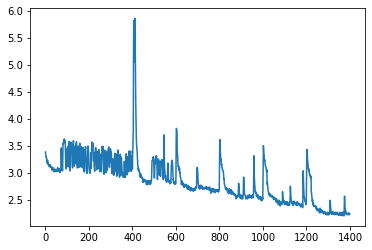

In [69]:
plt.figure()
plt.plot(motor[1])

In [70]:
motor_trace = motor[1,100:300]

In [71]:
correlation_map = np.zeros([dims[0],dims[1]])
for i in range(dims[0]):
    for j in range(dims[1]):
        fluo = a[i,j,100:300]
        correlation_map[i,j] = np.corrcoef(fluo, motor_trace)[0,1]
    if (i%10 == 0):
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250


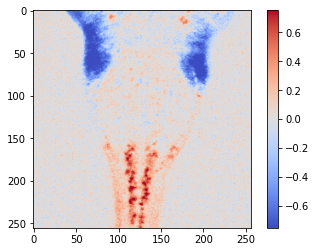

In [72]:
plt.figure()
plt.imshow(correlation_map.T,cmap = 'coolwarm',vmin = -0.75,vmax=0.75)
plt.colorbar()
plt.savefig(r'G:\My Drive\adenosine_paper_data\mdr_dbhCoCHR_\positive\f3_motor.svg',dpi=300)

In [52]:
mean = np.mean(np.mean(a,axis=0),axis=0)

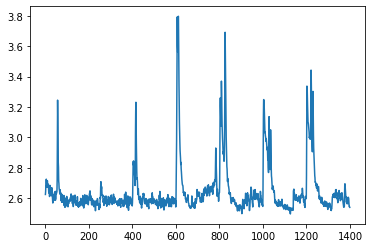

In [53]:
plt.figure()
plt.plot(mean)

In [74]:
glialCaList = [r'C:\Users\14076\Documents\f1_cochr_gfapjrgeco.csv',
              r'C:\Users\14076\Documents\f2_dbhcochr_gfapjrgeco.csv',
              r'C:\Users\14076\Documents\f3_cochr_gfapjrgeco.csv']

In [84]:
allCa = []
for glialCaFile in glialCaList:
    ca = motor = np.array(pd.read_csv(glialCaFile)).T
    allCa.append(ca[1])
    print(len(ca[1]))

800
800
673


In [104]:
stimStarts = [200,400]
allStims = np.zeros([9,150])
counter = 0
for i in range(len(allCa)):
    for j in range(len(stimStarts)):
        tstart = stimStarts[j] - 50
        tend = stimStarts[j] + 100
        signal = allCa[i][tstart:tend]
        baseline = np.mean(allCa[i][tstart:(tstart + 40)])
        dff = (signal - baseline)/baseline
        allStims[counter] = dff
        counter = counter + 1

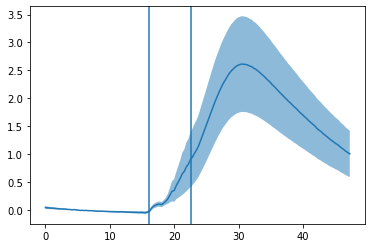

In [107]:
meanCa = np.mean(allStims,axis=0)
stdCa = np.std(allStims,axis=0)/np.sqrt(12)
time = ca[0][0:150]
plt.figure()
plt.plot(time,meanCa)
plt.fill_between(x=time,y1 = meanCa - stdCa,y2 = meanCa+stdCa,alpha = 0.5)
plt.axvline(x = (48/3))
plt.axvline(x = (68/3))
plt.savefig(r'G:\My Drive\adenosine_paper_figures\figS2\dbh_glialca.svg',dpi=300)